In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


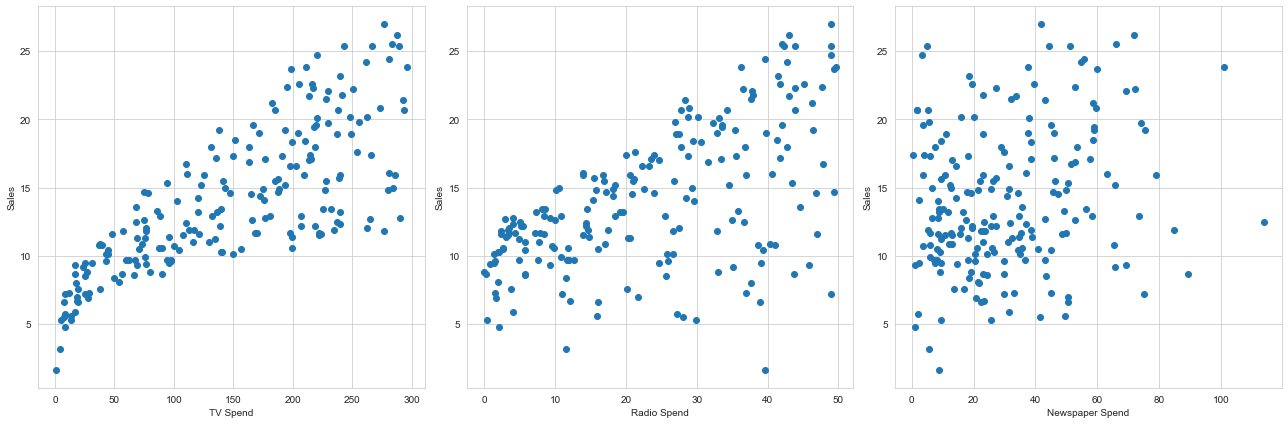

In [4]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].plot(df.TV, df.sales, 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df.radio, df.sales, 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df.newspaper, df.sales, 'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

In [7]:
x = df.drop(['sales'], axis=1)

In [8]:
y = df.sales

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

LinearRegression()

In [16]:
pred = model.predict(x_test)

In [19]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'MAE: {mae}\nMSE: {mse}\nRMSE: {mse**.5}')

MAE: 1.183930111231771
MSE: 2.677914162999545
RMSE: 1.6364333665015343


In [20]:
test_residuals = y_test - pred
print(test_residuals)

120    1.079608
160    0.075152
123    0.164630
89    -0.049492
157   -0.123821
162   -0.176481
46     1.644750
198    1.693666
138   -0.096681
34     1.763707
56    -2.893994
8      1.002221
131   -3.185208
27    -1.345436
59     0.186812
18     1.354068
57     0.352625
158   -2.891012
67     1.250797
101    0.481581
52     1.952039
72    -1.428937
153    0.822226
118    0.426572
41    -0.199721
68    -0.196921
152    0.132222
150   -2.515605
141    0.811763
25    -3.921993
15     1.665891
35    -4.548196
149    0.342077
48    -1.637748
88     1.236373
19     0.384172
74    -0.444592
21    -2.513204
168   -0.189445
137   -0.175763
Name: sales, dtype: float64


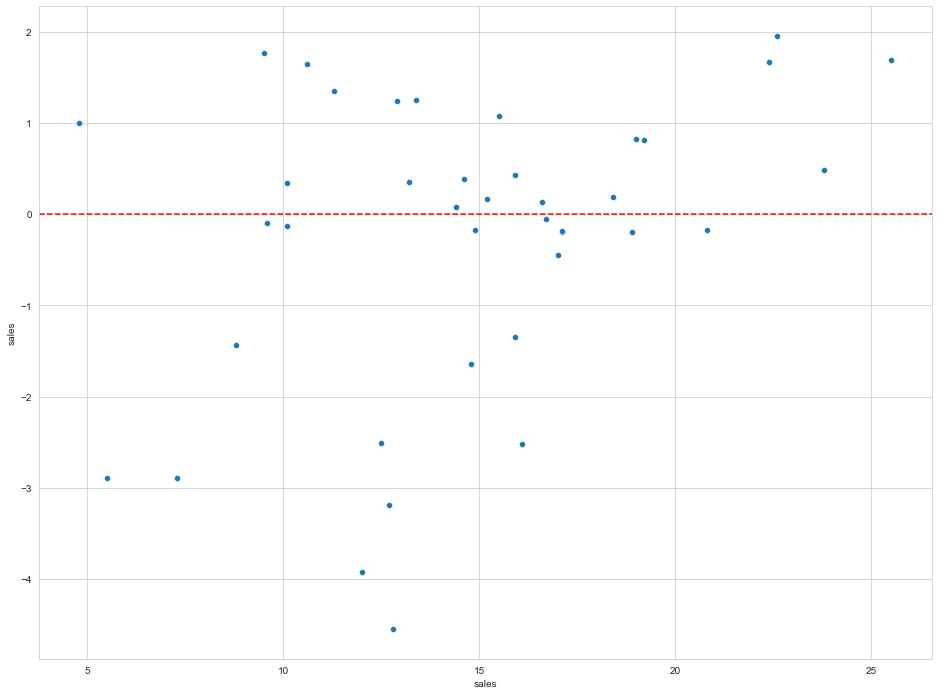

In [24]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

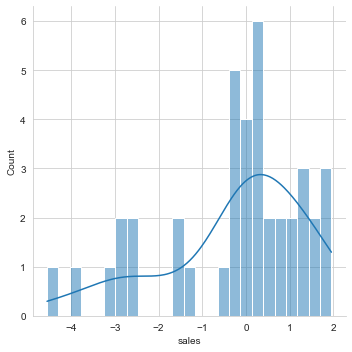

In [25]:
sns.displot(test_residuals, bins=25, kde=True)

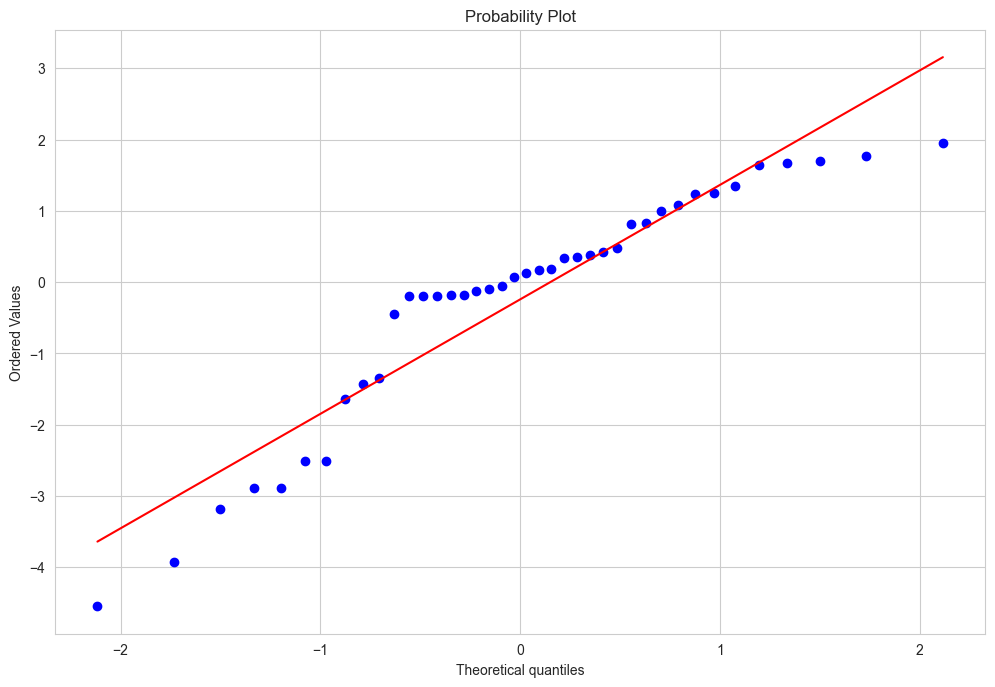

In [29]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)